In [1]:
# import the necessary packages
import imutils
import time
import cv2
from IPython.display import clear_output
import PIL.Image
from io import BytesIO
import IPython.display
import numpy as np

In [2]:
#Use 'jpeg' instead of 'png' (~5 times faster)
def array_to_image(a, fmt='jpeg'):
    #Create binary stream object
    f = BytesIO()
    #Convert array to binary stream object
    PIL.Image.fromarray(a).save(f, fmt)
    return IPython.display.Image(data=f.getvalue())

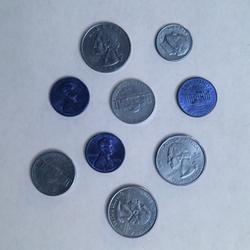

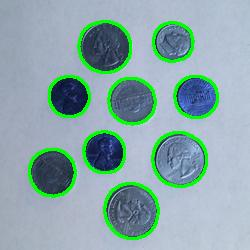

In [17]:
d = IPython.display.display("", display_id=1)
d2 = IPython.display.display("", display_id=2)

In [18]:
# Read the image
img=cv2.imread("coins.png")
#Call the function to convert array data to image
image = array_to_image(img)
d.update(image)

In [5]:
# Convert the image to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
# Blur the image slightly 
blurred = cv2.GaussianBlur(gray, (11,11), 0)

In [7]:
# Apply edge detection to the image to reveal the outlines of the coins
edged = cv2.Canny(blurred, 30, 150)

In [11]:
# Find contours in the edged image
# cv2.findContours method is destructive to the image you pass in
# Be sure to copy the image before calling cv2.findContours
cnts=cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)
print("I counted {} coins in this image".format(len(cnts)))

I counted 9 coins in this image


In [20]:
# Highlight the coins in the original image by drawing a green circle around them
# Copy the original image
coins = img.copy()
# Draw contours 
contours = cv2.drawContours(coins, cnts, -1, (0,255,0), 2)

In [21]:
# Save the image 
cv2.imwrite("contours.png", coins)
#Read image from disk (reads as array)
image=cv2.imread("contours.png")
#Call the function to convert array data to image
#Note: Scroll up to see the updated image in Ipython.display section
image = array_to_image(image)
d2.update(image)

In [22]:
# Run this to clear the output
IPython.display.clear_output()
print ("Clear")
cv2.destroyAllWindows()


Clear
